### MLP 4: Classification
Write your name
* xiaomei Xie
* Lili Hao

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from sklearn.linear_model import LinearRegression
from sklearn import metrics


import warnings


# to make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

warnings.filterwarnings('ignore')

In [3]:
def get_KFold_report(X, y):
    X = X.to_numpy()
    y = y.to_numpy()
    kf = KFold(n_splits=10, random_state=None, shuffle=True) # Define the split - into 2 folds 
    tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
    n=1
    for train_index, test_index in kf.split(X):
        print("=========================Kfold" , n , "=======================")
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        tree_clf.fit(X_train, y_train)

        y_pred = tree_clf.predict(X_test)

        # Print classification report
        target_names = TARGET_NAMES
        print(classification_report(y_test, y_pred, target_names=target_names))
        n = n+1

In [4]:
df = pd.read_csv('../processeddata/new_airlines_Normalized.csv')
df.head(10)

,Airport.Code,Airport.Name,Time.Label,Time.Month,Time.Month Name,Time.Year,# of Delays.Carrier,# of Delays.Late Aircraft,# of Delays.National Aviation System,# of Delays.Security,...,Flights.Total,Minutes Delayed.Carrier,Minutes Delayed.Late Aircraft,Minutes Delayed.National Aviation System,Minutes Delayed.Security,Minutes Delayed.Total,Minutes Delayed.Weather,Time.Month.level,Rate,Ratio_Rank
0,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2003/06,6,June,2003,0.301513,0.270412,0.350472,0.189474,...,0.770892,0.258823,0.185741,0.194317,0.104668,0.260628,0.253219,3.0,0.797538,2.0
1,BOS,"Boston, MA: Logan International",2003/06,6,June,2003,0.088067,0.093018,0.069295,0.042105,...,0.199003,0.066594,0.067780,0.037010,0.020004,0.064041,0.053621,3.0,0.816993,1.0
2,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",2003/06,6,June,2003,0.061849,0.088924,0.036424,0.094737,...,0.161140,0.035474,0.063728,0.025609,0.056173,0.051023,0.080223,3.0,0.844455,1.0
3,CLT,"Charlotte, NC: Charlotte Douglas International",2003/06,6,June,2003,0.063193,0.087787,0.074847,0.031579,...,0.171866,0.040725,0.053647,0.036017,0.025662,0.052444,0.048824,3.0,0.809804,1.0
4,DCA,"Washington, DC: Ronald Reagan Washington National",2003/06,6,June,2003,0.057479,0.041392,0.047307,0.052632,...,0.111460,0.036125,0.025243,0.031345,0.024247,0.038985,0.053373,3.0,0.816981,1.0
5,DEN,"Denver, CO: Denver International",2003/06,6,June,2003,0.135798,0.053900,0.066963,0.126316,...,0.256469,0.095996,0.040689,0.035574,0.142655,0.062256,0.072142,3.0,0.857412,1.0
6,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",2003/06,6,June,2003,0.293782,0.296566,0.231649,0.210526,...,0.702784,0.302179,0.222114,0.147246,0.138008,0.255248,0.268312,3.0,0.807261,1.0
7,DTW,"Detroit, MI: Detroit Metro Wayne County",2003/06,6,June,2003,0.088739,0.064817,0.056524,0.073684,...,0.258233,0.073498,0.039943,0.023820,0.028086,0.047111,0.045396,3.0,0.870087,1.0
8,EWR,"Newark, NJ: Newark Liberty International",2003/06,6,June,2003,0.070588,0.098476,0.209550,0.115789,...,0.279293,0.065993,0.075761,0.148035,0.099010,0.139297,0.102106,3.0,0.754918,2.0
9,FLL,"Fort Lauderdale, FL: Fort Lauderdale-Hollywood...",2003/06,6,June,2003,0.045378,0.038663,0.040644,0.063158,...,0.059622,0.030408,0.027852,0.021243,0.028491,0.030321,0.026511,3.0,0.787645,2.0


In [7]:
df.columns

Index(['Airport.Code', 'Airport.Name', 'Time.Label', 'Time.Month',
       'Time.Month Name', 'Time.Year', '# of Delays.Carrier',
       '# of Delays.Late Aircraft', '# of Delays.National Aviation System',
       '# of Delays.Security', '# of Delays.Weather',
       'Statistics.Carriers.Names', 'Carriers.Total', 'Flights.Cancelled',
       'Flights.Delayed', 'Flights.Diverted', 'Flights.On Time',
       'Flights.Total', 'Minutes Delayed.Carrier',
       'Minutes Delayed.Late Aircraft',
       'Minutes Delayed.National Aviation System', 'Minutes Delayed.Security',
       'Minutes Delayed.Total', 'Minutes Delayed.Weather', 'Time.Month.level',
       'Rate', 'Ratio_Rank'],
      dtype='object')

In [8]:
df.shape

(4408, 27)

In [14]:
col = ['# of Delays.Carrier',
       '# of Delays.Late Aircraft', '# of Delays.National Aviation System',
       '# of Delays.Security', '# of Delays.Weather',
       'Flights.Cancelled',
       'Flights.Delayed', 'Flights.Diverted', 'Flights.On Time',
       'Flights.Total', 'Minutes Delayed.Carrier',
       'Minutes Delayed.Late Aircraft',
       'Minutes Delayed.National Aviation System', 'Minutes Delayed.Security',
       'Minutes Delayed.Total', 'Minutes Delayed.Weather']

In [15]:
normalizedData = df[col]
normalizedData.shape

(4408, 16)

In [18]:
Xcol = ['# of Delays.Carrier',
       '# of Delays.Late Aircraft', '# of Delays.National Aviation System',
       '# of Delays.Security', '# of Delays.Weather',
        'Minutes Delayed.Carrier',
       'Minutes Delayed.Late Aircraft',
       'Minutes Delayed.National Aviation System', 'Minutes Delayed.Security',
       'Minutes Delayed.Weather']

In [19]:
X = normalizedData[Xcol]
print(X.shape)
X.head()

(4408, 10)


,# of Delays.Carrier,# of Delays.Late Aircraft,# of Delays.National Aviation System,# of Delays.Security,# of Delays.Weather,Minutes Delayed.Carrier,Minutes Delayed.Late Aircraft,Minutes Delayed.National Aviation System,Minutes Delayed.Security,Minutes Delayed.Weather
0,0.301513,0.270412,0.350472,0.189474,0.403206,0.258823,0.185741,0.194317,0.104668,0.253219
1,0.088067,0.093018,0.069295,0.042105,0.080148,0.066594,0.067780,0.037010,0.020004,0.053621
2,0.061849,0.088924,0.036424,0.094737,0.094945,0.035474,0.063728,0.025609,0.056173,0.080223
3,0.063193,0.087787,0.074847,0.031579,0.065351,0.040725,0.053647,0.036017,0.025662,0.048824
4,0.057479,0.041392,0.047307,0.052632,0.070284,0.036125,0.025243,0.031345,0.024247,0.053373


In [20]:
type(X)

pandas.core.frame.DataFrame

In [21]:
y = normalizedData["Flights.On Time"]
y.shape

(4408,)

In [22]:
y

0       0.745664
1       0.199287
2       0.169523
3       0.170304
4       0.112608
          ...   
4403    0.102732
4404    0.214729
4405    0.234482
4406    0.184049
4407    0.093161
Name: Flights.On Time, Length: 4408, dtype: float64

In [11]:
#get_KFold_report(X, y)

In [23]:
X = X.to_numpy()
print(type(X))

y = y.to_numpy()
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [24]:
X.shape

(4408, 10)

In [25]:
y.shape

(4408,)

### (1) Multivariate linear regression modeling

Saving figure Multivariate linear regression modeling


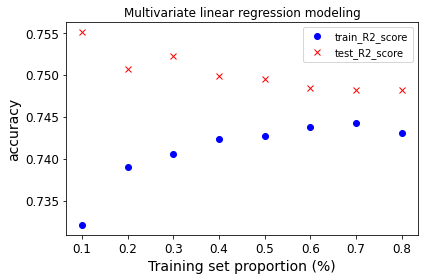

In [15]:
t = [x/10 for x in range(1, 9)]
plt.figure()
name = 'Multivariate linear regression modeling'
mean_test_r2=[]
mean_train_r2 = []
for s in t:

    train_R2_score = []
    test_R2_score = []
    y_pred = []
    RMSE_score = []
    for i in range(1,100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        #tree_clf.fit(X_train, y_train)
        linreg = LinearRegression().fit(X_train, y_train)
        train_R2_score.append(linreg.score(X_train, y_train))
        test_R2_score.append(linreg.score(X_test, y_test))
        yPred = linreg.predict(X_test)
        y_pred.append(linreg.predict(X_test))
        RMSE_score.append(np.sqrt(metrics.mean_squared_error(y_test, yPred)))
    testR2 = np.mean(test_R2_score)
    trainR2 = np.mean(train_R2_score)
    mean_test_r2.append(testR2)
    mean_train_r2.append(trainR2)
    plt.plot(s, np.mean(test_R2_score), 'bo')
    plt.plot(s, np.mean(train_R2_score), 'rx')
    plt.legend(['train_R2_score', 'test_R2_score'], loc='best')
    plt.title(name)
        


plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy')
save_fig(name)

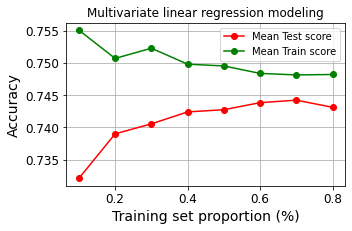

In [16]:
# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    
ax.set_title('Multivariate linear regression modeling')
ax.set_xlabel("Training set proportion (%)")
ax.set_ylabel("Accuracy")
ax.grid()

ax.plot(t, mean_test_r2, 'o-', color="r", label="Mean Test score")
ax.plot(t, mean_train_r2, 'o-', color="g", label="Mean Train score")
ax.legend(loc="best")

plt.show()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model original data intercept (b): {:.3f}'.format(linreg.intercept_))
print('linear model original data coeff (w): {}'.format(linreg.coef_))

# train data R2
print('R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
# test data R2
print('R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))

# make predictions on the testing set and print RMSE
y_pred = linreg.predict(X_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

linear model original data intercept (b): 0.052
linear model original data coeff (w): [-7.30645450e-01  1.24607230e-03  2.26740369e+00  6.29783539e-01
 -2.96073710e-01  5.71890971e-02  1.77591964e+00 -2.46958069e+00
 -2.82611973e-01  4.28451777e-01 -3.27444758e-01]
R-squared score (training): 0.754
R-squared score (test): 0.728
RMSE: 0.094


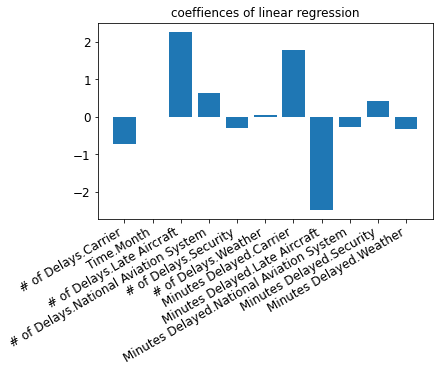

In [18]:
fig = plt.figure()
plt.bar(normalizedData[Xcol].columns, linreg.coef_, width=0.8, bottom=None, align='center')
plt.title("coeffiences of linear regression")
fig.autofmt_xdate()

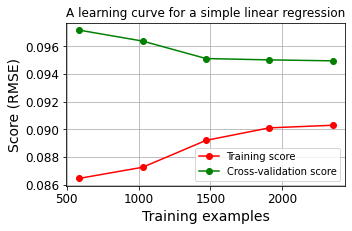

In [19]:
from sklearn.model_selection import learning_curve
    
# evaluate the training and testing and retrieve the information of model performance. 

train_sizes = np.linspace(0.2,0.8,5)  # 5 times 5*3 = 15

train_sizes, train_mse, test_mse = learning_curve(linreg, X, y, 
                            train_sizes = train_sizes, 
                            scoring = 'neg_mean_squared_error',
                                                 cv=3, shuffle=True)
train_scores = np.sqrt(np.abs(train_mse))

test_scores = np.sqrt(np.abs(test_mse))

train_scores_mean=np.mean(train_scores, axis=1)

test_scores_mean = np.mean(test_scores, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    
ax.set_title('A learning curve for a simple linear regression')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()



### Obtain theta using close form

<img src="images/cf.png" style="width: 200px;">
read pp. 118 - 122 of A. Geron textbook

### (2) Multivariate linear regression model with gradient descent 

In [20]:
# learning rate
alpha = 0.01

# number of iterations
n_iter = 100

# the number of data points
n = 100

# random initialization to theta. 
# Return samples (11 values for theta0 and theta1) from the “standard normal” distribution.
theta = np.random.randn(11, 1)
print('initial theta: \n', theta)

# the process of gradient descent
for iteration in range(n_iter):
    gradients = (1/n) * X_train.T.dot(X_train.dot(theta) - y_train)
    theta = theta - alpha*gradients

t = [0,1,2,3,4,5,6,7,8,9,10]
print('best theta: \n', theta)
#theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_R1)
#print(theta_best)

initial theta: 
 [[ 1.24357949]
 [-0.03189058]
 [-0.5011376 ]
 [ 1.1486678 ]
 [-0.41135556]
 [-0.23429606]
 [ 0.67086407]
 [-0.78068743]
 [ 0.20412026]
 [ 0.71358068]
 [-0.81983829]]
best theta: 
 [[-1.07255683e+117 -1.00661061e+117 -2.70143461e+116 ... -2.94653246e+116
  -3.53693393e+116 -2.95556001e+116]
 [-5.70926775e+118 -5.35823309e+118 -1.43798567e+118 ... -1.56845235e+118
  -1.88272568e+118 -1.57325776e+118]
 [-1.10431698e+117 -1.03641798e+117 -2.78142848e+116 ... -3.03378409e+116
  -3.64166830e+116 -3.04307895e+116]
 ...
 [-4.89158529e+116 -4.59082588e+116 -1.23203708e+116 ... -1.34381830e+116
  -1.61308133e+116 -1.34793547e+116]
 [-2.97739025e+116 -2.79432523e+116 -7.49911321e+115 ... -8.17949857e+115
  -9.81843789e+115 -8.20455880e+115]
 [-5.42168976e+116 -5.08833685e+116 -1.36555379e+116 ... -1.48944881e+116
  -1.78789207e+116 -1.49401216e+116]]


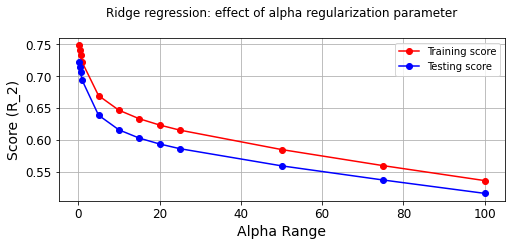

In [21]:
r2_train = []
linridge = []
r2_test = []
num_coeff_bigger =[]
alpha_Range = [0.2,0.4,0.6, 1, 5, 10, 15, 20, 25, 50, 75,100]
for this_alpha in alpha_Range:
    linridge_val = Ridge(alpha = this_alpha).fit(X_train, y_train)
    linridge.append(linridge_val)
    r2_train.append(linridge_val.score(X_train, y_train))
    r2_test.append(linridge_val.score(X_test, y_test))
    num_coeff_bigger.append(np.sum(abs(linridge_val.coef_) > 1.0))
    #print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
#r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         #.format(this_alpha, num_coeff_bigger, r2_train, r2_test))

y_predict = X_test.dot(theta)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
    
ax.set_title('Ridge regression: effect of alpha regularization parameter\n')
ax.set_xlabel("Alpha Range")
ax.set_ylabel("Score (R_2)")
ax.grid()

ax.plot(alpha_Range, r2_train, 'o-', color="r", label="Training score")
ax.plot(alpha_Range, r2_test, 'o-', color="b", label="Testing score")
ax.legend(loc="best")

plt.show()


### Linear regression using batch gradient descent

In [22]:
def batch_Gradient_Descent(alpha):
    # learning rate
    print("alpha=============,", alpha)
    #alpha = 0.0001
    #alpha = 0.0002

    # number of iterations
    #n_iter = 2000
    n_iter = 200

    # the number of data points
    n = 11
    theta = np.random.randn(11, 1)

    preCost = sys.maxsize
    bestCost = preCost

    preTheta = np.random.randn(11, 1)
    bestTheta = preTheta

    changeCost = bestCost

    # the process of gradient descent
    for iteration in range(n_iter):
        gradients = (1/n) * X_train.T.dot(X_train.dot(theta) - np.vstack(y_train))
        theta = theta - alpha*gradients

        cost = (X_train.dot(theta) - np.vstack(y_train)).T.dot(X_train.dot(theta) - np.vstack(y_train))[0][0] * (1/(2*n))
        if preCost-cost>0:
            bestCost = cost
            bestTheta = theta
            changeCost = preCost-cost
            #print(preCost-cost)
        else:
            break
            #print(preCost-cost)

        preCost = cost
        preTheta = theta    
    print("bestCost:",bestCost)
    #print(bestTheta)
    print("preCost-cost:",changeCost)

    theta = bestTheta
    #print('best theta: \n', theta)

    y_train_predict = X_train.dot(theta)
    train_error = np.sqrt(metrics.mean_squared_error(y_train, y_train_predict))
    print('training RMSE: {:.3f}'.format(train_error))

    y_test_predict = X_test.dot(theta)
    test_error = np.sqrt(metrics.mean_squared_error(y_test, y_test_predict))
    print('testing RMSE: {:.3f}\n'.format(test_error))
    
    return train_error, test_error

In [23]:
y_predict = X_test.dot(theta)
print(y_predict)

[[-5.14368040e+119 -4.82742091e+119 -1.29553194e+119 ... -1.41307397e+119
  -1.69621388e+119 -1.41740332e+119]
 [-6.86789618e+119 -6.44562319e+119 -1.72980788e+119 ... -1.88675123e+119
  -2.26480261e+119 -1.89253183e+119]
 [-5.13961133e+119 -4.82360203e+119 -1.29450707e+119 ... -1.41195611e+119
  -1.69487203e+119 -1.41628204e+119]
 ...
 [-4.00566702e+119 -3.75937835e+119 -1.00890202e+119 ... -1.10043847e+119
  -1.32093510e+119 -1.10380998e+119]
 [-2.85879153e+119 -2.68301857e+119 -7.20040020e+118 ... -7.85368370e+118
  -9.42733897e+118 -7.87774570e+118]
 [-5.14253082e+119 -4.82634202e+119 -1.29524240e+119 ... -1.41275815e+119
  -1.69583479e+119 -1.41708654e+119]]


### Alpah

In [24]:
alpha_sizes = [0.00001,0.0000125, 0.000015, 0.0000175, 0.00002, 0.000025,0.000030,0.000035, 0.000040,0.000045, \
               0.00005, 0.000075,0.0001,0.000125, 0.00015]#, 0.000175, 0.0002, 0.0005, 0.00075, 0.001]
train_errors = []
test_errors = []

for alpha in alpha_sizes:
    train_error, test_error= batch_Gradient_Descent(alpha)
    print(train_error, test_error)
    train_errors.append(train_error)
    test_errors.append(test_error)

alpha=============, 1e-05
bestCost: 13.090746548252335
preCost-cost: 0.004599313720362375
training RMSE: 0.306
testing RMSE: 0.302

0.30553851498075574 0.30200722097298166
alpha=============, 1.25e-05
bestCost: 53.41745442730677
preCost-cost: 0.03320549869397382
training RMSE: 0.617
testing RMSE: 0.613

0.6171991940910393 0.6126391235924772
alpha=============, 1.5e-05
bestCost: 14.312569398640225
preCost-cost: 0.007249172935576809
training RMSE: 0.319
testing RMSE: 0.318

0.3194791784583511 0.3175849470860169
alpha=============, 1.75e-05
bestCost: 5.113714931848486
preCost-cost: 0.002095407864616483
training RMSE: 0.191
testing RMSE: 0.181

0.19096422441996783 0.18142344071540326
alpha=============, 2e-05
bestCost: 2.013323919341432
preCost-cost: 0.0002784423778225964
training RMSE: 0.120
testing RMSE: 0.118

0.11982310871723262 0.11750961836693807
alpha=============, 2.5e-05
bestCost: 9.239010861997011
preCost-cost: 0.001074097163595411
training RMSE: 0.257
testing RMSE: 0.250

0.2566

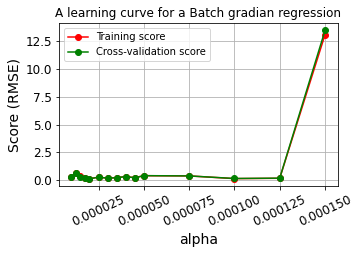

In [25]:
# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(5, 3))

ax.set_title('A learning curve for a Batch gradian regression')
ax.set_xlabel("alpha")
ax.set_ylabel("Score (RMSE)")
ax.grid()

ax.plot(alpha_sizes, train_errors, 'o-', color="r", label="Training score")
ax.plot(alpha_sizes, test_errors, 'o-', color="g", label="Cross-validation score")
for tick in ax.get_xticklabels(): 
    tick.set_rotation(25) 
ax.legend(loc="best")

plt.show()

### theta

In [26]:

# learning rate
#alpha = 0.0000125
alpha = 0.0001
#alpha = 0.0002

# number of iterations
n_iter = 10000
#n_iter = 100

# the number of data points
n = 11
theta = np.random.randn(11, 1)
#theta = bestTheta

preCost = sys.maxsize
bestCost = preCost

preTheta = np.random.randn(11, 1)
bestTheta = preTheta

changeCost = bestCost

# the process of gradient descent
for iteration in range(n_iter):
    gradients = (1/n) * X_train.T.dot(X_train.dot(theta) - np.vstack(y_train))
    theta = theta - alpha*gradients

    cost = (X_train.dot(theta) - np.vstack(y_train)).T.dot(X_train.dot(theta) - np.vstack(y_train))[0][0] * (1/(2*n))
    if preCost-cost>0:
        bestCost = cost
        bestTheta = theta
        changeCost = preCost-cost
        #print(preCost-cost)
    else:
        break
        #print(preCost-cost)

    preCost = cost
    preTheta = theta    
print("bestCost:",bestCost)
print(bestTheta)
print("preCost-cost:",changeCost)

theta = bestTheta
#print('best theta: \n', theta)

y_train_predict = X_train.dot(theta)
train_error = np.sqrt(metrics.mean_squared_error(y_train, y_train_predict))
print('training RMSE: {:.3f}'.format(train_error))

y_test_predict = X_test.dot(theta)
test_error = np.sqrt(metrics.mean_squared_error(y_test, y_test_predict))
print('testing RMSE: {:.3f}\n'.format(test_error))

bestCost: 1.9516134519101704
[[ 0.6514461 ]
 [ 0.00397956]
 [ 0.56133827]
 [ 0.11745345]
 [ 0.5249891 ]
 [-0.96215457]
 [ 0.28700602]
 [-0.46590338]
 [ 0.03982603]
 [-0.20402516]
 [ 1.18624396]]
preCost-cost: 4.521947077873456e-05
training RMSE: 0.118
testing RMSE: 0.120



In [27]:
import numpy
def rsq(actual, predict):
    corr_matrix = numpy.corrcoef(actual, predict)
    corr = corr_matrix[0,1]
    R_sq = corr**2

    #print(R_sq)
    return R_sq

In [28]:
theta = bestTheta
#print('best theta: \n', theta)

train_score = rsq(y_train, np.hstack(y_train_predict))
print('training R squared: {:.3f}'.format(train_score))

y_train_predict = X_train.dot(theta)
train_error = np.sqrt(metrics.mean_squared_error(y_train, y_train_predict))
#print(np.hstack(y_train_predict))
print('training RMSE: {:.3f}'.format(train_error))

test_score = rsq(y_test, np.hstack(y_test_predict))
print('testing R squared: {:.3f}'.format(test_score))

y_test_predict = X_test.dot(theta)
test_error = np.sqrt(metrics.mean_squared_error(y_test, y_test_predict))
#print(np.hstack(y_test_predict))
print('testing RMSE: {:.3f}\n'.format(test_error))

training R squared: 0.585
training RMSE: 0.118
testing R squared: 0.565
testing RMSE: 0.120



### trainin test splits 

In [29]:
theta = bestTheta

train_errors = []
test_errors = []

train_sizes = np.linspace(0.1, 0.90, 10)

for train_size in train_sizes:
    # random initialization to theta. 
    # Return samples (11 values for theta0 and theta1) from the “standard normal” distribution.
    test_size = 1 - train_size
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    
    print("test_size = : ", test_size)

    y_train_predict = X_train.dot(theta)
    train_error = np.sqrt(metrics.mean_squared_error(y_train, y_train_predict))
    print('training RMSE: {:.3f}'.format(train_error))
    train_errors.append(np.sqrt(train_error))

    y_test_predict = X_test.dot(theta)
    test_error = np.sqrt(metrics.mean_squared_error(y_test, y_test_predict))
    print('testing RMSE: {:.3f}\n'.format(test_error))
    test_errors.append(np.sqrt(test_error))

test_size = :  0.9
training RMSE: 0.118
testing RMSE: 0.119

test_size = :  0.8111111111111111
training RMSE: 0.116
testing RMSE: 0.119

test_size = :  0.7222222222222222
training RMSE: 0.115
testing RMSE: 0.120

test_size = :  0.6333333333333333
training RMSE: 0.119
testing RMSE: 0.118

test_size = :  0.5444444444444444
training RMSE: 0.116
testing RMSE: 0.121

test_size = :  0.4555555555555555
training RMSE: 0.117
testing RMSE: 0.120

test_size = :  0.3666666666666667
training RMSE: 0.119
testing RMSE: 0.117

test_size = :  0.2777777777777778
training RMSE: 0.116
testing RMSE: 0.124

test_size = :  0.18888888888888888
training RMSE: 0.118
testing RMSE: 0.119

test_size = :  0.09999999999999998
training RMSE: 0.119
testing RMSE: 0.113



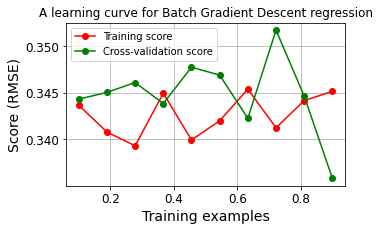

In [30]:

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    
ax.set_title('A learning curve for Batch Gradient Descent regression')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (RMSE)")
ax.grid()

ax.plot(train_sizes, train_errors, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_errors, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

In [31]:
np.hstack(theta)[0:]

array([ 0.6514461 ,  0.00397956,  0.56133827,  0.11745345,  0.5249891 ,
       -0.96215457,  0.28700602, -0.46590338,  0.03982603, -0.20402516,
        1.18624396])

In [32]:
normalizedData[Xcol].columns

Index(['# of Delays.Carrier', 'Time.Month', '# of Delays.Late Aircraft',
       '# of Delays.National Aviation System', '# of Delays.Security',
       '# of Delays.Weather', 'Minutes Delayed.Carrier',
       'Minutes Delayed.Late Aircraft',
       'Minutes Delayed.National Aviation System', 'Minutes Delayed.Security',
       'Minutes Delayed.Weather'],
      dtype='object')

### bar chart for best theta 

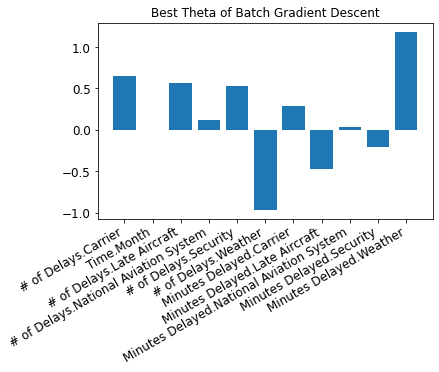

In [33]:
fig = plt.figure()
plt.bar(normalizedData[Xcol].columns, np.hstack(theta)[0:], width=0.8, bottom=None, align='center')
plt.title("Best Theta of Batch Gradient Descent")
fig.autofmt_xdate()

### (3) Regularized linear regression models with feature normalization
Ridge regression model 

In [34]:
from sklearn.linear_model import RidgeCV
print('Ridge regression: effect of alpha regularization parameter\n')
train_errors = []
test_errors = []

train_R_sq= []
test_R_sq = []

alpha_sizes = [0, 0.0001, 0.001, 0.01, 0.02, 0.05, 0.075, 0.1,0.2]#,0.3,0.4, 0.5, 0.6, 0.7,0.8,0.9, 1]

for this_alpha in alpha_sizes:
    linridge = RidgeCV(alphas = [this_alpha],cv = 10).fit(X_train, y_train)
    
    r2_train = linridge.score(X_train, y_train)
    train_R_sq.append(r2_train)
    r2_test = linridge.score(X_test, y_test)
    test_R_sq.append(r2_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
                    r-squared training: {:.2f}, r-squared test: {:.2f}'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))
    
    y_pred = linridge.predict(X_train)
    train_error = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
    print('Training RMSE: {:.3f}'.format(train_error))
    train_errors.append(train_error)

    # make predictions on the testing set
    y_pred = linridge.predict(X_test)
    test_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    print('Testing RMSE: {:.3f}\n'.format(test_error))
    test_errors.append(test_error)

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 3,                     r-squared training: 0.75, r-squared test: 0.75
Training RMSE: 0.091
Testing RMSE: 0.090

Alpha = 0.00
num abs(coeff) > 1.0: 3,                     r-squared training: 0.75, r-squared test: 0.75
Training RMSE: 0.091
Testing RMSE: 0.090

Alpha = 0.00
num abs(coeff) > 1.0: 3,                     r-squared training: 0.75, r-squared test: 0.75
Training RMSE: 0.091
Testing RMSE: 0.090

Alpha = 0.01
num abs(coeff) > 1.0: 3,                     r-squared training: 0.75, r-squared test: 0.75
Training RMSE: 0.091
Testing RMSE: 0.090

Alpha = 0.02
num abs(coeff) > 1.0: 3,                     r-squared training: 0.75, r-squared test: 0.75
Training RMSE: 0.091
Testing RMSE: 0.090

Alpha = 0.05
num abs(coeff) > 1.0: 3,                     r-squared training: 0.75, r-squared test: 0.75
Training RMSE: 0.091
Testing RMSE: 0.090

Alpha = 0.07
num abs(coeff) > 1.0: 3,                     

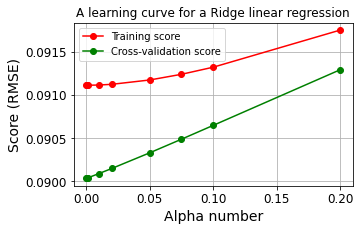

In [35]:
# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(5, 3))

ax.set_title('A learning curve for a Ridge linear regression')
ax.set_xlabel("Alpha number")
ax.set_ylabel("Score (RMSE)")
ax.grid()

ax.plot(alpha_sizes, train_errors, 'o-', color="r", label="Training score")
ax.plot(alpha_sizes, test_errors, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

In [36]:
# change the parameter values for range of lower and upper bound of training data size
# and the number of iterations, and see the changes in the learning curve. 
train_sizes = np.linspace(0.1, 0.90, 10)

linridge = Ridge(alpha=0.01)

train_sizes, train_mse, test_mse = \
            learning_curve(linridge, X, y, scoring='neg_mean_squared_error', 
                           train_sizes = train_sizes, cv=10, shuffle=True, random_state=1)
    
train_scores = np.sqrt(np.abs(train_mse))
test_scores = np.sqrt(np.abs(test_mse))
#print(train_scores)
#print(test_scores)

train_scores_mean = np.mean(train_scores, axis=1)

test_scores_mean = np.mean(test_scores, axis=1)
print("training RMSE: ",train_scores_mean)
print("testing RMSE: ", test_scores_mean)

training RMSE:  [0.08829321 0.09005763 0.09017083 0.09017668 0.09000425 0.08995185
 0.09001061 0.09058182 0.09042759 0.09093699]
testing RMSE:  [0.09448705 0.09518036 0.09535508 0.09479349 0.09423852 0.09387219
 0.09382304 0.09368041 0.09365472 0.09372435]


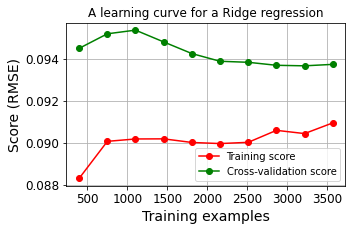

In [37]:
# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    
ax.set_title('A learning curve for a Ridge regression')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()


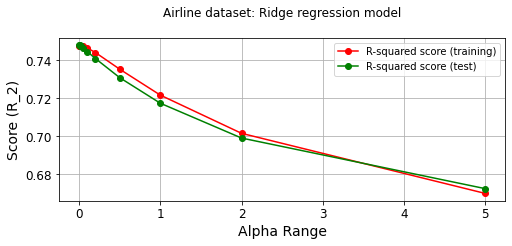

In [38]:
from sklearn.linear_model import Ridge

r2_train = []
linridge = []
r2_test = []
yPredicts = []
rmse = []
intercept_s = []
coef_s = []


alpha_Range = [0.001,0.005,0.01,0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5]



for this_alpha in alpha_Range:
    linridge_val = Ridge(alpha = this_alpha).fit(X_train, y_train)
    linridge.append(linridge_val)
    r2_train.append(linridge_val.score(X_train, y_train))
    r2_test.append(linridge_val.score(X_test, y_test))
    y_pred = linridge_val.predict(X_test)
    yPredicts.append(y_pred)
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    intercept_s.append(linridge_val.intercept_)
    coef_s.append(linridge_val.coef_)
    #print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
#r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         #.format(this_alpha, num_coeff_bigger, r2_train, r2_test))


# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
    
ax.set_title('Airline dataset: Ridge regression model\n')
ax.set_xlabel("Alpha Range")
ax.set_ylabel("Score (R_2)")
ax.grid()

ax.plot(alpha_Range, r2_train, 'o-', color="r", label="R-squared score (training)")
ax.plot(alpha_Range, r2_test, 'o-', color="g", label="R-squared score (test)")
ax.legend(loc="best")

plt.show()


### K cross validation 

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

In [40]:
from sklearn.linear_model import RidgeCV

linridge = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1], cv = 10).fit(X, y)

print('ridge regression linear model alpha: {}'.format(linridge.alpha_))
print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))

print('R-squared score (training): {:.3f}'.format(linridge.score(X_train, y_train)))

print('R-squared score (test): {:.3f}'.format(linridge.best_score_))

# make predictions on the testing set and print RMSE
y_pred = linridge.predict(X_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

ridge regression linear model alpha: 0.01
ridge regression linear model intercept: 0.05326624190019877
ridge regression linear model coeff:
[-7.51221573e-01  1.40563423e-03  2.26520330e+00  7.33966247e-01
 -1.83874613e-01 -4.90124409e-02  1.75921802e+00 -2.45620003e+00
 -3.80424359e-01  2.50906901e-01 -2.30620238e-01]
R-squared score (training): 0.748
R-squared score (test): 0.727
RMSE: 0.091


In [41]:
from sklearn.linear_model import Ridge

linridge = Ridge(alpha=0.001).fit(X_train, y_train)

print('Airline dataset')

print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))

# make predictions on the testing set
y_pred = linridge.predict(X_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))

print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ != 0)))

Airline dataset
R-squared score (training): 0.748
R-squared score (test): 0.742
RMSE: 0.091
ridge regression linear model intercept: 0.051303964551650455
ridge regression linear model coeff:
[-7.73015811e-01  1.74623989e-03  2.30607722e+00  7.51069569e-01
 -1.82817995e-01 -1.08028369e-01  1.77568979e+00 -2.49510193e+00
 -3.97147044e-01  2.55038433e-01 -1.79700948e-01]
Number of non-zero features: 11


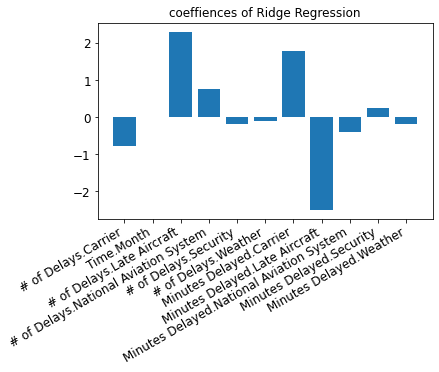

In [42]:
fig = plt.figure()
plt.bar(normalizedData[Xcol].columns, linridge.coef_, width=0.8, bottom=None, align='center')
plt.title("coeffiences of Ridge Regression")
fig.autofmt_xdate()

In [43]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train, y_train)
    r2_train = linridge.score(X_train, y_train)
    r2_test = linridge.score(X_test, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 3, r-squared training: 0.75, r-squared test: 0.74

Alpha = 1.00
num abs(coeff) > 1.0: 2, r-squared training: 0.72, r-squared test: 0.72

Alpha = 10.00
num abs(coeff) > 1.0: 0, r-squared training: 0.64, r-squared test: 0.66

Alpha = 20.00
num abs(coeff) > 1.0: 0, r-squared training: 0.62, r-squared test: 0.64

Alpha = 50.00
num abs(coeff) > 1.0: 0, r-squared training: 0.58, r-squared test: 0.61

Alpha = 100.00
num abs(coeff) > 1.0: 0, r-squared training: 0.54, r-squared test: 0.56

Alpha = 1000.00
num abs(coeff) > 1.0: 0, r-squared training: 0.23, r-squared test: 0.22



### Lasso regression model 

In [44]:
from sklearn.linear_model import Lasso

linlasso = Lasso(alpha=0.001).fit(X_train, y_train)

print('Airline dataset')

print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test, y_test)))

# make predictions on the testing set
y_pred = linlasso.predict(X_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
    
print('lasso regression linear model intercept: {}'.format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'.format(linlasso.coef_))

print('Non-zero features: {}'.format(np.sum(linlasso.coef_ != 0)))
 
print('Features with non-zero weight (sorted by absolute magnitude):')
for e in sorted (list(zip(list(X), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Airline dataset
R-squared score (training): 0.632
R-squared score (test): 0.657

RMSE: 0.105
lasso regression linear model intercept: 0.06362003425774465
lasso regression linear model coeff:
[ 0.          0.00245844  0.2236659   0.02713034  0.         -0.
  0.94614561 -0.         -0.          0.         -0.        ]
Non-zero features: 4
Features with non-zero weight (sorted by absolute magnitude):
	[0.29378151 6.         0.29656584 0.23164908 0.21052632 0.31689273
 0.30217897 0.22211351 0.14724569 0.13800768 0.26831239], 0.946
	[0.06184874 6.         0.08892427 0.03642421 0.09473684 0.09494451
 0.03547351 0.06372839 0.02560903 0.05617296 0.08022262], 0.224
	[0.06319328 6.         0.08778713 0.07484731 0.03157895 0.06535142
 0.04072539 0.05364714 0.03601723 0.02566175 0.04882436], 0.027
	[0.08806723 6.         0.09301797 0.06929484 0.04210526 0.08014797
 0.06659372 0.06778028 0.03701008 0.02000404 0.05362077], 0.002


### Lasso with different lambdas
Apply the Lasso regression on the training set with the following λ parameters: (0.0001, 0.0005, 0.0007,0.001,0.002, 0.004, 0.007, 0.01, 0.015,0.02). Evaluate the R^2 score for all the models you obtain on both the train and test sets.

### Plot values as function of lambda 
Plot all values for both data sets (train and test 
R2-values) as a function of λ. Comment on your findings.

In [45]:
lambdas = (0.001, 0.01, 0.1, 0.5, 1, 2, 10)
l_num = 7
pred_num = X.shape[1]

# prepare data for enumerate
coeff_a = np.zeros((l_num, pred_num))
train_r_squared = np.zeros(l_num)
test_r_squared = np.zeros(l_num)
# enumerate through lambdas with index and i
for ind, i in enumerate(lambdas):    
    reg = Lasso(alpha = i)
    reg.fit(X_train, y_train)

    #coeff_a[ind,:] = reg.coef_
    train_r_squared[ind] = reg.score(X_train, y_train)
    test_r_squared[ind] = reg.score(X_test, y_test)

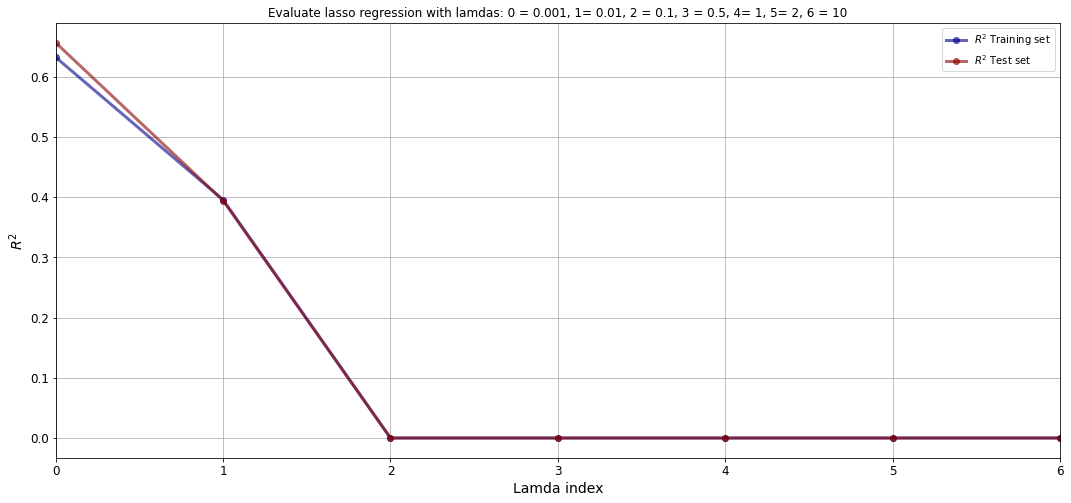

In [46]:
# Plotting
plt.figure(figsize=(18, 8))
plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", alpha=0.6, linewidth=3)
plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", alpha=0.6, linewidth=3)
plt.xlabel('Lamda index'); plt.ylabel(r'$R^2$')
plt.xlim(0, 6)
plt.title(r'Evaluate lasso regression with lamdas: 0 = 0.001, 1= 0.01, 2 = 0.1, 3 = 0.5, 4= 1, 5= 2, 6 = 10')
plt.legend(loc='best')
plt.grid()

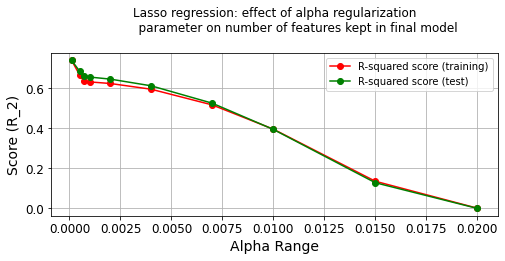

In [47]:
r2_train = []
r2_test = []

feature_kept = []


alpha_list=[0.0001, 0.0005, 0.0007,0.001,0.002, 0.004, 0.007, 0.01, 0.015,0.02]

for alpha in alpha_list :
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train, y_train)
    r2_train.append(linlasso.score(X_train, y_train))
    r2_test.append(linlasso.score(X_test, y_test))
    feature_kept.append(np.sum(linlasso.coef_ != 0))
    
    #print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
#r-squared test: {:.2f}\n'
         #.format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))
    
# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
    
ax.set_title('Lasso regression: effect of alpha regularization\n\
            parameter on number of features kept in final model\n')
ax.set_xlabel("Alpha Range")
ax.set_ylabel("Score (R_2)")
ax.grid()

ax.plot(alpha_list, r2_train, 'o-', color="r", label="R-squared score (training)")
ax.plot(alpha_list, r2_test, 'o-', color="g", label="R-squared score (test)")
ax.legend(loc="best")

plt.show()


### Identify best lambda and coefficients
Store your test data results in a DataFrame and indentify the lambda where the 
R
2
 has it’s maximum value in the test data. Fit a Lasso model with this lambda parameter (use the training data) and obtain the corresponding regression coefficients. Furthermore, obtain the mean squared error for the test data of this model (module: from sklearn.metrics import mean_squared_error)

In [48]:
df_lam = pd.DataFrame(test_r_squared*100, columns=['R_squared'])
df_lam['lambda'] = (lambdas)
# returns the index of the row where column has maximum value.
df_lam.loc[df_lam['R_squared'].idxmax()]

R_squared    65.670329
lambda        0.001000
Name: 0, dtype: float64

In [49]:
# Coefficients of best model
reg_best = Lasso(alpha = 0.1)
reg_best.fit(X_train, y_train)
reg_best.coef_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [50]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, reg_best.predict(X_test))

0.032335554153546706

### Cross Validation 
Evaluate the performance of a Lasso regression for different regularization parameters λ using 5-fold cross validation on the training set (module: from sklearn.model_selection import cross_val_score) and plot the cross-validation (CV) R2 scores of the training and test data as a function of λ.
Use the following lambda parameters: l_min = 0.05 l_max = 0.2 l_num = 20 lambdas = np.linspace(l_min,l_max, l_num)

In [51]:
l_min = 0.05
l_max = 0.2
l_num = 20
lambdas = np.linspace(l_min,l_max, l_num)

train_r_squared = np.zeros(l_num)
test_r_squared = np.zeros(l_num)

pred_num = X.shape[1]
coeff_a = np.zeros((l_num, pred_num))

In [52]:
from sklearn.model_selection import cross_val_score

for ind, i in enumerate(lambdas):    
    reg = Lasso(alpha = i)
    reg.fit(X_train, y_train)
    results = cross_val_score(reg, X, y, cv=5, scoring="r2")

    train_r_squared[ind] = reg.score(X_train, y_train)    
    test_r_squared[ind] = reg.score(X_test, y_test)

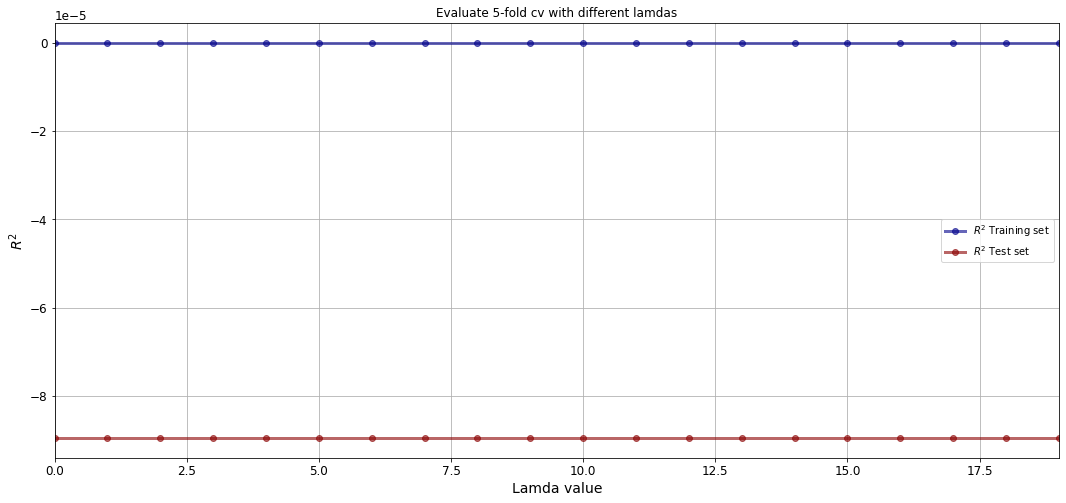

In [53]:
# Plotting
plt.figure(figsize=(18, 8))
plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", alpha=0.6, linewidth=3)
plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", alpha=0.6, linewidth=3)
plt.xlabel('Lamda value'); plt.ylabel(r'$R^2$')
plt.xlim(0, 19)
plt.title(r'Evaluate 5-fold cv with different lamdas')
plt.legend(loc='best')
plt.grid()

### 2.8 Best Model
Finally, store your test data results in a DataFrame and identify the lambda where the 
R
2
 has it’s maximum value in the test data. Fit a Lasso model with this lambda parameter (use the training data) and obtain the corresponding regression coefficients. Furthermore, obtain the mean squared error for the test data of this model (module: from sklearn.metrics import mean_squared_error) 

In [54]:
df_lam = pd.DataFrame(test_r_squared*100, columns=['R_squared'])
df_lam['lambda'] = (lambdas)
# returns the index of the row where column has maximum value.
df_lam.loc[df_lam['R_squared'].idxmax()]

R_squared   -0.00895
lambda       0.05000
Name: 0, dtype: float64

In [55]:
# Best Model
reg_best = Lasso(alpha = 0.00001)
reg_best.fit(X_train, y_train)

Lasso(alpha=1e-05)

In [56]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test, reg_best.predict(X_test)))

0.09130996547413765

In [57]:
reg_best.coef_

array([-7.44153131e-01,  1.75375321e-03,  2.26318623e+00,  7.32599759e-01,
       -1.65087498e-01, -9.75965786e-02,  1.75083824e+00, -2.44630258e+00,
       -3.82939559e-01,  2.31378673e-01, -1.87916052e-01])

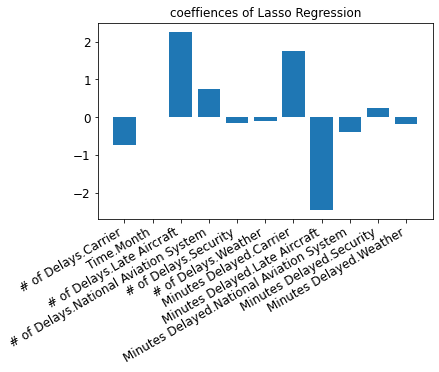

In [58]:
fig = plt.figure()
plt.bar(normalizedData[Xcol].columns, reg_best.coef_, width=0.8, bottom=None, align='center')
plt.title("coeffiences of Lasso Regression")
fig.autofmt_xdate()

In [59]:
from sklearn.linear_model import LassoCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
linlasso = LassoCV(alphas=[1e-6,1e-5,1e-4,1e-3, 1e-2, 1e-1, 1], cv = 10).fit(X, y)

print('ridge regression linear model alpha: {}'.format(linlasso.alpha_))
print('ridge regression linear model intercept: {}'.format(linlasso.intercept_))
print('ridge regression linear model coeff:\n{}'.format(linlasso.coef_))

print('R-squared score (training): {:.3f}'.format(linlasso.score(X_train, y_train)))

print('R-squared score (test): {:.3f}'.format(linlasso.score(X_test, y_test)))

# make predictions on the testing set and print RMSE
y_pred = linlasso.predict(X_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

ridge regression linear model alpha: 1e-06
ridge regression linear model intercept: 0.05329989980870095
ridge regression linear model coeff:
[-7.60985702e-01  1.40289088e-03  2.29477366e+00  7.21622829e-01
 -1.82737858e-01 -4.85448672e-02  1.76935637e+00 -2.49126240e+00
 -3.65743343e-01  2.49583296e-01 -2.29666979e-01]
R-squared score (training): 0.742
R-squared score (test): 0.798
RMSE: 0.080


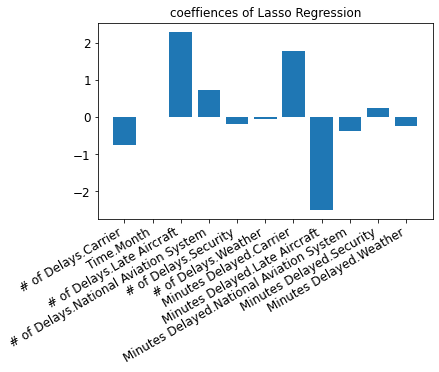

In [60]:
fig = plt.figure()
plt.bar(normalizedData[Xcol].columns, linlasso.coef_, width=0.8, bottom=None, align='center')
plt.title("coeffiences of Lasso Regression")
fig.autofmt_xdate()

### (4) Polynomial regression models 
a). LinearRegression : Degree, Learing Curve, R-squart, K cross validation

b). Ridge Regression : Degree, Alpha, Learing Curve, R-squart, K cross validation

c). Lasso Regression : Degree Alpha, Learing Curve, R-squart, K cross validation

## Linear Regression 

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

In [62]:
from sklearn.preprocessing import PolynomialFeatures

# change the parameter values for range of lower and upper bound of training data size
# and the number of iterations, and see the changes in the learning curve. 
degree_sizes = [1, 2, 3]
train_scores_mean = []
test_scores_mean = []
for degree in degree_sizes:
    print("degree =", degree)
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=0)
    #print(degree)
    
    linreg_poly = LinearRegression().fit(X_train, y_train)

    #==================================================================================
    #print('(poly deg 2) linear model coeff (w):\n{}'
     #    .format(linreg_poly.coef_))
    #print('(poly deg 2) linear model intercept (b): {:.3f}'
    #     .format(linreg_poly.intercept_))
    print('(poly deg ', linreg_poly, ') R-squared score (training): {:.3f}'
         .format(linreg_poly.score(X_train, y_train)))
    print('(poly deg ', linreg_poly, ') R-squared score (test): {:.3f}'
         .format(linreg_poly.score(X_test, y_test)))
    
    y_pred = linreg_poly.predict(X_train)
    train_score_mean = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
    print('Training RMSE: {:.3f}'.format(train_score_mean))
    train_scores_mean.append(train_score_mean)

    # make predictions on the testing set
    y_pred = linreg_poly.predict(X_test)
    test_score_mean = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    print('Testing RMSE: {:.3f}\n'.format(test_score_mean))
    test_scores_mean.append(test_score_mean)

degree = 1
(poly deg  LinearRegression() ) R-squared score (training): 0.755
(poly deg  LinearRegression() ) R-squared score (test): 0.724
Training RMSE: 0.090
Testing RMSE: 0.093

degree = 2
(poly deg  LinearRegression() ) R-squared score (training): 0.793
(poly deg  LinearRegression() ) R-squared score (test): 0.768
Training RMSE: 0.083
Testing RMSE: 0.085

degree = 3
(poly deg  LinearRegression() ) R-squared score (training): 0.813
(poly deg  LinearRegression() ) R-squared score (test): 0.157
Training RMSE: 0.079
Testing RMSE: 0.162



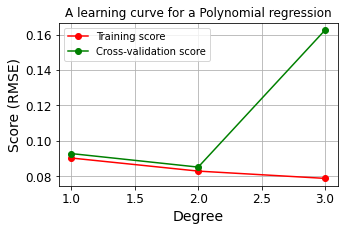

In [63]:
# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(5, 3))

ax.set_title('A learning curve for a Polynomial regression')
ax.set_xlabel("Degree")
ax.set_ylabel("Score (RMSE)")
ax.grid()

ax.plot(degree_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(degree_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

In [64]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=0)

### A learning curve 

training RMSE:  [0.08797106 0.08997609 0.09013293 0.09015443 0.08998905 0.08994131
 0.09000272 0.09057573 0.09042288 0.09093324]
testing RMSE:  [0.09452184 0.095182   0.09540136 0.09481474 0.09425107 0.09388102
 0.09382943 0.09368181 0.09366134 0.09373373]


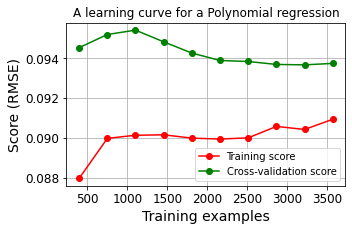

In [65]:
from sklearn.model_selection import learning_curve
    
# change the parameter values for range of lower and upper bound of training data size
# and the number of iterations, and see the changes in the learning curve. 

linreg_poly = LinearRegression()

train_sizes = np.linspace(0.1, 0.90, 10)

train_sizes, train_mse, test_mse = \
            learning_curve(linreg_poly, X, y, scoring='neg_mean_squared_error', 
                           train_sizes = train_sizes, cv=10, shuffle=True, random_state=1)
    
train_scores = np.sqrt(np.abs(train_mse))
test_scores = np.sqrt(np.abs(test_mse))
#print(train_scores)
#print(test_scores)

train_scores_mean = np.mean(train_scores, axis=1)

test_scores_mean = np.mean(test_scores, axis=1)
print("training RMSE: ",train_scores_mean)
print("testing RMSE: ", test_scores_mean)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    
ax.set_title('A learning curve for a Polynomial regression')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

### R-Squart 

In [66]:
linreg_poly = LinearRegression().fit(X_train, y_train)

#print('(poly deg 2) linear model coeff (w):\n{}'
 #    .format(linreg_poly.coef_))
#print('(poly deg 2) linear model intercept (b): {:.3f}'
#     .format(linreg_poly.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg_poly.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}'
     .format(linreg_poly.score(X_test, y_test)))

# make predictions on the testing set
y_pred = linreg_poly.predict(X_test)
print('(poly deg 2) RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

(poly deg 2) R-squared score (training): 0.793
(poly deg 2) R-squared score (test): 0.768
(poly deg 2) RMSE: 0.085


### K cross validation 

In [67]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(linreg_poly, X_train, y_train, cv=10)
#print(score)
#print(score.sum()/10)

#print('linear model original data intercept (b): {:.3f}'.format(linreg_poly.intercept_))
#print('linear model original data coeff (w): {}'.format(linreg_poly.coef_))

# train data R2
print('(poly deg 2) R-squared score (training): {:.3f}'.format(score.sum()/10))
# test data R2
print('(poly deg 2) R-squared score (test): {:.3f}'.format(linreg_poly.score(X_test, y_test)))

# make predictions on the testing set and print RMSE
y_pred = linreg_poly.predict(X_test)
print('(poly deg 2) RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

(poly deg 2) R-squared score (training): 0.757
(poly deg 2) R-squared score (test): 0.768
(poly deg 2) RMSE: 0.085


## Ridge 

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

### Degree

In [69]:
# change the parameter values for range of lower and upper bound of training data size
# and the number of iterations, and see the changes in the learning curve. 
degree_sizes = [1, 2, 3, 4]#, 5]
train_scores_mean = []
test_scores_mean = []
for degree in degree_sizes:
    print("degree =", degree)
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=0)
    #print(degree)
    
    linrig_poly = Ridge(alpha = 0.01).fit(X_train, y_train)
    
    train_score = linrig_poly.score(X_train, y_train)
    print('(poly deg ', linrig_poly, ') R-squared score (training): {:.3f}'
         .format(train_score))
    test_score = linrig_poly.score(X_test, y_test)
    print('(poly deg ', linrig_poly, ') R-squared score (test): {:.3f}'
         .format(test_score))
    
    y_pred = linrig_poly.predict(X_train)
    train_score_mean = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
    print('Training RMSE: {:.3f}'.format(train_score_mean))
    train_scores_mean.append(train_score_mean)

    # make predictions on the testing set
    y_pred = linrig_poly.predict(X_test)
    test_score_mean = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    print('Testing RMSE: {:.3f}\n'.format(test_score_mean))
    test_scores_mean.append(test_score_mean)

degree = 1
(poly deg  Ridge(alpha=0.01) ) R-squared score (training): 0.754
(poly deg  Ridge(alpha=0.01) ) R-squared score (test): 0.724
Training RMSE: 0.090
Testing RMSE: 0.093

degree = 2
(poly deg  Ridge(alpha=0.01) ) R-squared score (training): 0.793
(poly deg  Ridge(alpha=0.01) ) R-squared score (test): 0.776
Training RMSE: 0.083
Testing RMSE: 0.084

degree = 3
(poly deg  Ridge(alpha=0.01) ) R-squared score (training): 0.824
(poly deg  Ridge(alpha=0.01) ) R-squared score (test): 0.770
Training RMSE: 0.077
Testing RMSE: 0.085

degree = 4
(poly deg  Ridge(alpha=0.01) ) R-squared score (training): 0.848
(poly deg  Ridge(alpha=0.01) ) R-squared score (test): 0.760
Training RMSE: 0.071
Testing RMSE: 0.087



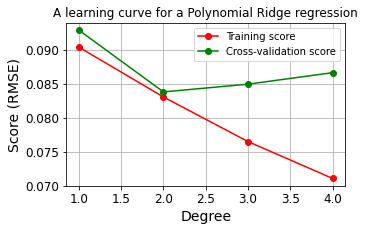

In [70]:
# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(5, 3))

ax.set_title('A learning curve for a Polynomial Ridge regression')
ax.set_xlabel("Degree")
ax.set_ylabel("Score (RMSE)")
ax.grid()

ax.plot(degree_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(degree_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()


In [71]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=0)

### alpha 

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=0)

In [73]:
train_scores_mean = []
test_scores_mean = []

alpha_sizes = [0, 0.0001, 0.001, 0.01, 0.02, 0.05, 0.075, 0.1,0.2,0.3,0.4, 0.5, 0.6, 0.7,0.8,0.9, 1,2,]

for this_alpha in alpha_sizes:
    linrig_poly = Ridge(alpha = this_alpha).fit(X_train, y_train)
    r2_train = linrig_poly.score(X_train, y_train)
    r2_test = linrig_poly.score(X_test, y_test)
    num_coeff_bigger = np.sum(abs(linrig_poly.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))
    
    y_pred = linrig_poly.predict(X_train)
    train_score_mean = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
    print('Training RMSE: {:.3f}'.format(train_score_mean))
    train_scores_mean.append(train_score_mean)

    # make predictions on the testing set
    y_pred = linrig_poly.predict(X_test)
    test_score_mean = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    print('Testing RMSE: {:.3f}\n'.format(test_score_mean))
    test_scores_mean.append(test_score_mean)

Alpha = 0.00
num abs(coeff) > 1.0: 57, r-squared training: 0.80, r-squared test: 0.77
Training RMSE: 0.082
Testing RMSE: 0.084

Alpha = 0.00
num abs(coeff) > 1.0: 51, r-squared training: 0.80, r-squared test: 0.78
Training RMSE: 0.082
Testing RMSE: 0.084

Alpha = 0.00
num abs(coeff) > 1.0: 39, r-squared training: 0.80, r-squared test: 0.78
Training RMSE: 0.082
Testing RMSE: 0.083

Alpha = 0.01
num abs(coeff) > 1.0: 11, r-squared training: 0.79, r-squared test: 0.78
Training RMSE: 0.083
Testing RMSE: 0.084

Alpha = 0.02
num abs(coeff) > 1.0: 7, r-squared training: 0.79, r-squared test: 0.77
Training RMSE: 0.084
Testing RMSE: 0.084

Alpha = 0.05
num abs(coeff) > 1.0: 6, r-squared training: 0.79, r-squared test: 0.77
Training RMSE: 0.084
Testing RMSE: 0.085

Alpha = 0.07
num abs(coeff) > 1.0: 4, r-squared training: 0.78, r-squared test: 0.76
Training RMSE: 0.085
Testing RMSE: 0.086

Alpha = 0.10
num abs(coeff) > 1.0: 4, r-squared training: 0.78, r-squared test: 0.76
Training RMSE: 0.085
T

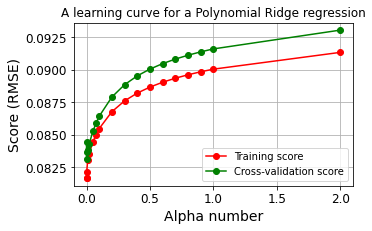

In [74]:
# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(5, 3))

ax.set_title('A learning curve for a Polynomial Ridge regression')
ax.set_xlabel("Alpha number")
ax.set_ylabel("Score (RMSE)")
ax.grid()

ax.plot(alpha_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(alpha_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()


### Learning Curve 

training RMSE:  [0.08829321 0.09005763 0.09017083 0.09017668 0.09000425 0.08995185
 0.09001061 0.09058182 0.09042759 0.09093699]
testing RMSE:  [0.09448705 0.09518036 0.09535508 0.09479349 0.09423852 0.09387219
 0.09382304 0.09368041 0.09365472 0.09372435]


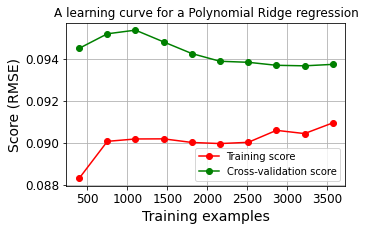

In [75]:
from sklearn.model_selection import learning_curve
    
# change the parameter values for range of lower and upper bound of training data size
# and the number of iterations, and see the changes in the learning curve. 
linrig_poly = Ridge(alpha = 0.01)

train_sizes = np.linspace(0.1, 0.90, 10)

train_sizes, train_mse, test_mse = \
            learning_curve(linrig_poly, X, y, scoring='neg_mean_squared_error', 
                           train_sizes = train_sizes, cv=10, shuffle=True, random_state=1)
    
train_scores = np.sqrt(np.abs(train_mse))
test_scores = np.sqrt(np.abs(test_mse))
#print(train_scores)
#print(test_scores)

train_scores_mean = np.mean(train_scores, axis=1)

test_scores_mean = np.mean(test_scores, axis=1)
print("training RMSE: ",train_scores_mean)
print("testing RMSE: ", test_scores_mean)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    
ax.set_title('A learning curve for a Polynomial Ridge regression')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

### R-Squared

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=0)

linridge_poly = Ridge(alpha = 0.01).fit(X_train, y_train)


print('Airline dataset')

print('R-squared score (training): {:.3f}'
     .format(linridge_poly.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge_poly.score(X_test, y_test)))

# make predictions on the testing set
y_pred = linridge_poly.predict(X_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

#print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
#print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))

print('Number of non-zero features: {}'.format(np.sum(linridge_poly.coef_ != 0)))

Airline dataset
R-squared score (training): 0.793
R-squared score (test): 0.776
RMSE: 0.084
Number of non-zero features: 77


In [77]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(linridge_poly, X_train, y_train, cv=10)

# train data R2
print('R-squared score (training): {:.3f}'.format(score.sum()/10))
# test data R2
print('R-squared score (test): {:.3f}'.format(linridge_poly.score(X_test, y_test)))

# make predictions on the testing set and print RMSE
y_pred = linridge_poly.predict(X_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

R-squared score (training): 0.774
R-squared score (test): 0.776
RMSE: 0.084


In [78]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 0.01, 0.05, 0.075, 0.1, 0.5, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train, y_train)
    r2_train = linridge.score(X_train, y_train)
    r2_test = linridge.score(X_test, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 57, r-squared training: 0.80, r-squared test: 0.77

Alpha = 0.01
num abs(coeff) > 1.0: 11, r-squared training: 0.79, r-squared test: 0.78

Alpha = 0.05
num abs(coeff) > 1.0: 6, r-squared training: 0.79, r-squared test: 0.77

Alpha = 0.07
num abs(coeff) > 1.0: 4, r-squared training: 0.78, r-squared test: 0.76

Alpha = 0.10
num abs(coeff) > 1.0: 4, r-squared training: 0.78, r-squared test: 0.76

Alpha = 0.50
num abs(coeff) > 1.0: 0, r-squared training: 0.76, r-squared test: 0.74

Alpha = 1.00
num abs(coeff) > 1.0: 0, r-squared training: 0.76, r-squared test: 0.73

Alpha = 10.00
num abs(coeff) > 1.0: 0, r-squared training: 0.73, r-squared test: 0.70

Alpha = 20.00
num abs(coeff) > 1.0: 0, r-squared training: 0.71, r-squared test: 0.68

Alpha = 50.00
num abs(coeff) > 1.0: 0, r-squared training: 0.67, r-squared test: 0.64

Alpha = 100.00
num abs(coeff) > 1.0: 0, r-squared training: 0.64, r-squared

### lasso Regression

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

### Degree

In [80]:
# change the parameter values for range of lower and upper bound of training data size
# and the number of iterations, and see the changes in the learning curve. 
degree_sizes = [1, 2, 3, 4, 5, 6]#, 7, 8, 9]

train_scores_mean = []
test_scores_mean = []

for degree in degree_sizes:
    print("degree =", degree)
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=0)
    
    linlasso_poly = Lasso(alpha = 0.000001).fit(X_train, y_train)

    train_score = linlasso_poly.score(X_train, y_train)
    print('(poly deg ', linlasso_poly, ') R-squared score (training): {:.3f}'
         .format(train_score))
    test_score = linlasso_poly.score(X_test, y_test)
    print('(poly deg ', linlasso_poly, ') R-squared score (test): {:.3f}'
         .format(test_score))
    
    y_pred = linlasso_poly.predict(X_train)
    train_score_mean = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
    print('Training RMSE: {:.3f}'.format(train_score_mean))
    train_scores_mean.append(train_score_mean)

    # make predictions on the testing set
    y_pred = linlasso_poly.predict(X_test)
    test_score_mean = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    print('Testing RMSE: {:.3f}\n'.format(test_score_mean))
    test_scores_mean.append(test_score_mean)

degree = 1
(poly deg  Lasso(alpha=1e-06) ) R-squared score (training): 0.755
(poly deg  Lasso(alpha=1e-06) ) R-squared score (test): 0.724
Training RMSE: 0.090
Testing RMSE: 0.093

degree = 2
(poly deg  Lasso(alpha=1e-06) ) R-squared score (training): 0.793
(poly deg  Lasso(alpha=1e-06) ) R-squared score (test): 0.777
Training RMSE: 0.083
Testing RMSE: 0.084

degree = 3
(poly deg  Lasso(alpha=1e-06) ) R-squared score (training): 0.819
(poly deg  Lasso(alpha=1e-06) ) R-squared score (test): 0.773
Training RMSE: 0.078
Testing RMSE: 0.084

degree = 4
(poly deg  Lasso(alpha=1e-06) ) R-squared score (training): 0.830
(poly deg  Lasso(alpha=1e-06) ) R-squared score (test): 0.763
Training RMSE: 0.075
Testing RMSE: 0.086

degree = 5
(poly deg  Lasso(alpha=1e-06) ) R-squared score (training): 0.838
(poly deg  Lasso(alpha=1e-06) ) R-squared score (test): 0.732
Training RMSE: 0.073
Testing RMSE: 0.092

degree = 6
(poly deg  Lasso(alpha=1e-06) ) R-squared score (training): 0.845
(poly deg  Lasso(a

### Learing Curve

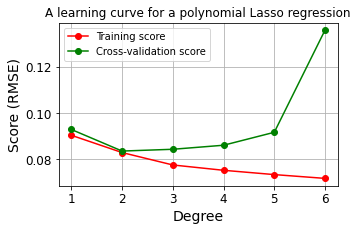

In [81]:
# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(5, 3))

ax.set_title('A learning curve for a polynomial Lasso regression')
ax.set_xlabel("Degree")
ax.set_ylabel("Score (RMSE)")
ax.grid()

ax.plot(degree_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(degree_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()


### Alpha

In [82]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=0)

In [83]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

train_scores_mean = []
test_scores_mean = []

#alpha_sizes = [0.0, 0.001, 0.01, 0.025, 0.05, 0.075, 0.25, 0.5, 1, 5]
alpha_sizes =  [0.0, 0.0000001,0.0000005,0.000001,0.000005, 0.00001,0.00005, 0.0001]

for alpha in alpha_sizes:
    linlasso_poly = Lasso(alpha, max_iter = 10000).fit(X_train, y_train)
    r2_train = linlasso_poly.score(X_train, y_train)
    r2_test = linlasso_poly.score(X_test, y_test)
    
    print('Alpha = {:.8f}\nFeatures kept: {}, r-squared training: {:.8f}, \
r-squared test: {:.8f}'
         .format(alpha, np.sum(linlasso_poly.coef_ != 0), r2_train, r2_test))
    
    y_pred = linlasso_poly.predict(X_train)
    train_score_mean = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
    print('Training RMSE: {:.5f}'.format(train_score_mean))
    train_scores_mean.append(train_score_mean)

    # make predictions on the testing set
    y_pred = linlasso_poly.predict(X_test)
    test_score_mean = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    print('Testing RMSE: {:.5f}\n'.format(test_score_mean))
    test_scores_mean.append(test_score_mean)

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.00000000
Features kept: 77, r-squared training: 0.79768431, r-squared test: 0.77301654
Training RMSE: 0.08206
Testing RMSE: 0.08432

Alpha = 0.00000010
Features kept: 76, r-squared training: 0.79771821, r-squared test: 0.77456077
Training RMSE: 0.08206
Testing RMSE: 0.08403

Alpha = 0.00000050
Features kept: 72, r-squared training: 0.79723327, r-squared test: 0.77747560
Training RMSE: 0.08216
Testing RMSE: 0.08348

Alpha = 0.00000100
Features kept: 64, r-squared training: 0.79635152, r-squared test: 0.77788379
Training RMSE: 0.08233
Testing RMSE: 0.08341

Alpha = 0.00000500
Features kept: 45, r-squared training: 0.79129953, r-squared test: 0.77489583
Training RMSE: 0.08335
Testing RMSE: 0.08397

Alpha = 0.00001000
Features kept: 41, r-squared training: 0.78780492, r-squared test: 0.77172622
Training RMSE: 0.08404
Testing RMSE: 0.08455

Alpha = 0.00005000
Features kept: 22, r-

### Learning Curve 

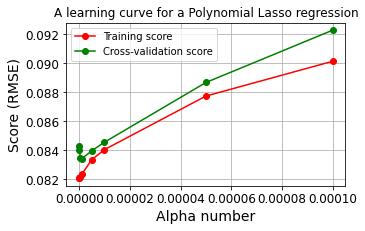

In [84]:
# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(5, 3))

ax.set_title('A learning curve for a Polynomial Lasso regression')
ax.set_xlabel("Alpha number")
ax.set_ylabel("Score (RMSE)")
ax.grid()

ax.plot(alpha_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(alpha_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

### Split Train size/ Testing Size 

training RMSE:  [0.08978535 0.09013308 0.09035372 0.09008659 0.09006698 0.09014008
 0.09043721 0.09056646 0.09050067 0.09093338]
testing RMSE:  [0.09523997 0.09540034 0.09491063 0.09438289 0.0938961  0.09391817
 0.09354175 0.09375116 0.09362185 0.09372925]


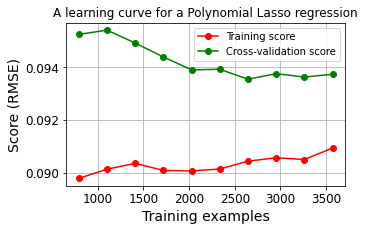

In [85]:
from sklearn.model_selection import learning_curve
    
# change the parameter values for range of lower and upper bound of training data size
# and the number of iterations, and see the changes in the learning curve. 

linlasso_poly = Lasso(alpha = 0.000001)

train_sizes = np.linspace(0.2, 0.90, 10)

train_sizes, train_mse, test_mse = \
            learning_curve(linlasso_poly, X, y, scoring='neg_mean_squared_error', 
                           train_sizes = train_sizes, cv=10, shuffle=True, random_state=1)
    
train_scores = np.sqrt(np.abs(train_mse))
test_scores = np.sqrt(np.abs(test_mse))
#print(train_scores)
#print(test_scores)

train_scores_mean = np.mean(train_scores, axis=1)

test_scores_mean = np.mean(test_scores, axis=1)
print("training RMSE: ",train_scores_mean)
print("testing RMSE: ", test_scores_mean)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    
ax.set_title('A learning curve for a Polynomial Lasso regression')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y,
                                                   random_state = 0)

linlasso_poly = Lasso(alpha = 0.000001).fit(X_train, y_train)

print('Airline dataset')

print('R-squared score (training): {:.3f}'
     .format(linlasso_poly.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linlasso_poly.score(X_test, y_test)))

# make predictions on the testing set
y_pred = linlasso_poly.predict(X_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
    
#print('lasso regression linear model intercept: {}'.format(linlasso.intercept_))
#print('lasso regression linear model coeff:\n{}'.format(linlasso.coef_))

print('Non-zero features: {}\n'.format(np.sum(linlasso_poly.coef_ != 0)))

Airline dataset
R-squared score (training): 0.793
R-squared score (test): 0.777
RMSE: 0.084
Non-zero features: 72



In [87]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(linlasso_poly, X_train, y_train, cv=10)
#print(score)
#print(score.sum()/10)

#print('linear model original data intercept (b): {:.3f}'.format(linreg_poly.intercept_))
#print('linear model original data coeff (w): {}'.format(linreg_poly.coef_))

# train data R2
print('R-squared score (training): {:.3f}'.format(score.sum()/10))
# test data R2
print('R-squared score (test): {:.3f}'.format(linlasso_poly.score(X_test, y_test)))

# make predictions on the testing set and print RMSE
y_pred = linlasso_poly.predict(X_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

R-squared score (training): 0.771
R-squared score (test): 0.777
RMSE: 0.084


In [88]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X_poly, y,
                                                   random_state = 0)

linlasso = Lasso(alpha = 0.00001).fit(X_train, y_train)

print('Airline dataset')

print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test, y_test)))

# make predictions on the testing set
y_pred = linlasso.predict(X_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
    
print('lasso regression linear model intercept: {}'.format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'.format(linlasso.coef_))

print('Non-zero features: {}'.format(np.sum(linlasso.coef_ != 0)))
 
print('Features with non-zero weight (sorted by absolute magnitude):')
for e in sorted (list(zip(list(X), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Airline dataset
R-squared score (training): 0.787
R-squared score (test): 0.772

RMSE: 0.085
lasso regression linear model intercept: -0.05069931745494011
lasso regression linear model coeff:
[ 0.00000000e+00 -4.20787543e-01  1.94499416e-02  3.29692084e+00
  1.03544713e+00 -1.72286860e-02  5.54217995e-02  1.58154638e+00
 -3.27015739e+00 -7.37706945e-01 -0.00000000e+00 -1.31800827e-01
 -0.00000000e+00 -5.03324642e-02  0.00000000e+00  0.00000000e+00
 -6.17531372e-01  0.00000000e+00 -6.01513015e-03  3.82176622e-02
  1.64081819e-01 -0.00000000e+00 -0.00000000e+00 -1.13053922e-03
  3.88582049e-02 -2.85238767e-05 -2.16037740e-02 -3.16474498e-02
  5.63394935e-02 -5.28697584e-02  3.82636228e-03  3.32863098e-02
  1.26799469e-02 -2.18241999e+00  0.00000000e+00 -6.13527931e-01
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  4.98547784e-01
 -0.00000000e+00  0.00000000e+00 -4.33905282e-01  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000

In [89]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.0,0.001, 0.01, 0.025, 0.05, 0.075, 0.25, 0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train, y_train)
    r2_train = linlasso.score(X_train, y_train)
    r2_test = linlasso.score(X_test, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.00
Features kept: 77, r-squared training: 0.80, r-squared test: 0.77

Alpha = 0.00
Features kept: 13, r-squared training: 0.72, r-squared test: 0.69

Alpha = 0.01
Features kept: 3, r-squared training: 0.50, r-squared test: 0.47

Alpha = 0.03
Features kept: 3, r-squared training: 0.48, r-squared test: 0.46

Alpha = 0.05
Features kept: 3, r-squared training: 0.40, r-squared test: 0.39

Alpha = 0.07
Features kept: 3, r-squared training: 0.26, r-squared test: 0.27

Alpha = 0.25
Features kept: 0, r-squared training: 0.00, r-squared test: -0.00

Alpha = 0.50
Features kept: 0, r-squared training: 0.00, r-squared test: -0.00

Alpha = 1.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.00

Alpha = 2.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.00

Alpha = 3.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.00

Alpha = 5.00
Features 